In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds_1000.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.23,Very Good,F,VS2,61.0,59.0,402,3.95,3.99,2.42
996,996,0.23,Very Good,F,VS2,59.1,59.0,402,4.02,4.07,2.39
997,997,0.23,Very Good,F,VS2,61.6,59.0,402,3.96,4.00,2.45
998,998,0.23,Very Good,F,VS2,59.4,57.0,402,4.06,4.09,2.42


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = df[df['cut'] == 'Premium'][['price', 'carat', 'x', 'y', 'z']]
df

,price,carat,x,y,z
1,326,0.21,3.89,3.84,2.31
3,334,0.29,4.20,4.23,2.63
12,342,0.22,3.88,3.84,2.33
14,345,0.20,3.79,3.75,2.27
15,345,0.32,4.38,4.42,2.68
...,...,...,...,...,...
944,394,0.30,4.27,4.31,2.68
952,394,0.30,4.25,4.29,2.66
953,394,0.30,4.27,4.32,2.69
971,397,0.27,4.11,4.13,2.57


In [5]:
df

,price,carat,x,y,z
1,326,0.21,3.89,3.84,2.31
3,334,0.29,4.20,4.23,2.63
12,342,0.22,3.88,3.84,2.33
14,345,0.20,3.79,3.75,2.27
15,345,0.32,4.38,4.42,2.68
...,...,...,...,...,...
944,394,0.30,4.27,4.31,2.68
952,394,0.30,4.25,4.29,2.66
953,394,0.30,4.27,4.32,2.69
971,397,0.27,4.11,4.13,2.57


In [6]:
Xz = (df - df.mean()) / df.std()
Xz

,price,carat,x,y,z
1,-2.748511,-1.708368,-1.573886,-1.710757,-1.869035
3,-2.496862,-0.015238,-0.206440,-0.128526,0.176421
12,-2.245213,-1.496726,-1.617997,-1.710757,-1.741194
14,-2.150844,-1.920009,-2.014998,-2.075887,-2.124717
15,-2.150844,0.619685,0.587561,0.642305,0.496023
...,...,...,...,...,...
944,-0.609494,0.196403,0.102338,0.196034,0.496023
952,-0.609494,0.196403,0.014116,0.114894,0.368182
953,-0.609494,0.196403,0.102338,0.236604,0.559943
971,-0.515126,-0.438521,-0.603441,-0.534226,-0.207102


In [7]:
zs, mus, cs = np.linalg.svd(Xz, full_matrices = False)

In [8]:
cs = -cs
zs = -zs 
z1 = np.sqrt(mus[0]) * zs[:, 0]
z2 = np.sqrt(mus[1]) * zs[:, 1]

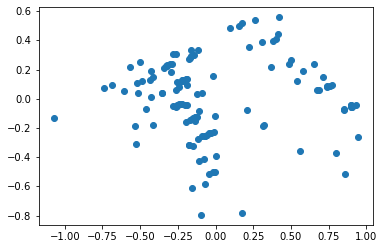

In [9]:
plt.scatter(z1, z2)

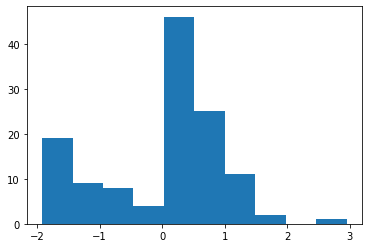

In [10]:
plt.hist(Xz['carat'])
plt.show()

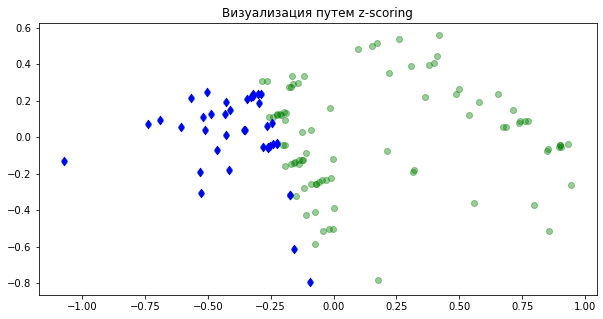

In [11]:
mask = Xz['carat'] > 0.6

plt.figure(figsize=(10, 5))
plt.title('Визуализация путем z-scoring')
plt.scatter(z1, z2, alpha=0.4)
plt.scatter(z1[mask], z2[mask], alpha=1, marker='d')
plt.show()

In [12]:
from numpy.linalg import eig

In [13]:
cov = np.dot(Xz.T, Xz) / (Xz.shape[0]-1)
cov

array([[1.        , 0.51625098, 0.54669033, 0.54191278, 0.49136621],
       [0.51625098, 1.        , 0.97964105, 0.98330238, 0.97903204],
       [0.54669033, 0.97964105, 1.        , 0.99246839, 0.94344489],
       [0.54191278, 0.98330238, 0.99246839, 1.        , 0.95567676],
       [0.49136621, 0.97903204, 0.94344489, 0.95567676, 1.        ]])

In [14]:
eig_val, eig_vec = eig(cov)

In [15]:
eig_val

array([4.25460284, 0.66485917, 0.06431606, 0.01005429, 0.00616764])

In [16]:
eig_vec

array([[-0.30660768, -0.94980548,  0.0612674 , -0.00952689, -0.00410093],
       [-0.47815043,  0.17107227,  0.11481297, -0.79851413, -0.30215825],
       [-0.47744826,  0.11724042, -0.52970722, -0.02649433,  0.69065633],
       [-0.47886672,  0.12873767, -0.36492858,  0.49412661, -0.61382351],
       [-0.46914147,  0.19566584,  0.75452083,  0.34266801,  0.23430346]])

In [17]:
eig_vec[:, 0]

array([-0.30660768, -0.47815043, -0.47744826, -0.47886672, -0.46914147])

In [18]:
eig_vec[:, 1]

array([-0.94980548,  0.17107227,  0.11724042,  0.12873767,  0.19566584])

In [19]:
z1_ = np.dot(Xz, eig_vec[:, 0]) / np.sqrt(Xz.shape[0] * eig_val[0])

In [20]:
cov = cov - eig_val[0] * eig_vec[:, 0].reshape((5, 1)) * eig_vec[:, 0]

In [21]:
eig_val, eig_vec = eig(cov)

In [22]:
z2_ = np.dot(Xz, -eig_vec[:, 0]) / np.sqrt(Xz.shape[0] * eig_val[0])

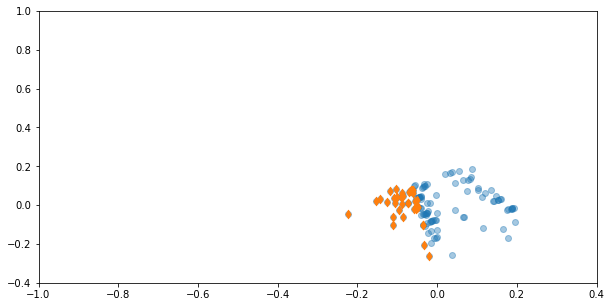

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(z1_, z2_, alpha=0.4)
plt.scatter(z1_[mask], z2_[mask], alpha=1, marker='d')
plt.xlim(-1.0, 0.4)
plt.ylim(-0.4, 1.0)
plt.show()

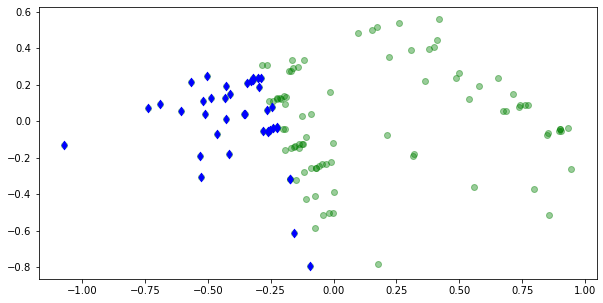

In [24]:
mask = Xz['carat'] > 0.6

plt.figure(figsize=(10, 5))
plt.scatter(z1, z2, alpha=0.4)
plt.scatter(z1[mask], z2[mask], alpha=1, marker='d')
plt.show()